In [1]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import io
%cd "C:\Users\admin\Desktop\python\Flight price prediction data"

C:\Users\admin\Desktop\python\Flight price prediction data


In [3]:
train = pd.read_excel('Data_Train.xlsx')
test= pd.read_excel('Test_Set.xlsx')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [6]:
print(test.shape)
print(train.shape)

(2671, 10)
(10683, 11)


In [7]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# For Data preprocessing Train and Test data must be concated.
test['Price']="test"

In [9]:
print(train.shape)
print(test.shape)

(10683, 11)
(2671, 11)


In [10]:
combineddf=pd.concat([train,test],axis=0)

# EDA & Feature Engineering

In [12]:
combineddf['Date'] = combineddf['Date_of_Journey'].str.split('/').str[0]

In [13]:
combineddf['Month'] = combineddf['Date_of_Journey'].str.split('/').str[1]
combineddf['Year'] = combineddf['Date_of_Journey'].str.split('/').str[2]

In [14]:
combineddf = combineddf.drop(['Date_of_Journey'],axis=1)

In [15]:
combineddf.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [14]:
combineddf['Date'] = combineddf['Date'].astype(int)
combineddf['Month'] = combineddf['Month'].astype(int)
combineddf['Year'] = combineddf['Year'].astype(int)

In [15]:
combineddf.dtypes

Airline            object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price              object
Date                int32
Month               int32
Year                int32
dtype: object

In [18]:
train.Price.describe()

count    10683.000000
mean      9087.064121
std       4611.359167
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

So from above report we can say that minimum prize of the flight is 1759.00 and
maximum is 79512.00

Text(0, 0.5, 'Count of flights')

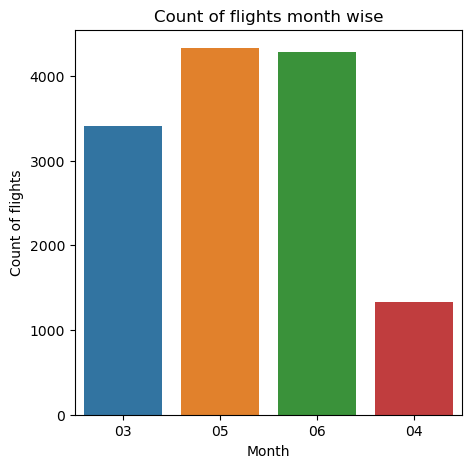

In [50]:
plt.figure(figsize = (5, 5))
plt.title('Count of flights month wise')
sns.countplot(x = 'Month', data = combineddf)
plt.xlabel('Month')
plt.ylabel('Count of flights')

There are around 4500 flights scheduled in the month of may so at this time can be the peak month for the airlines as compared to april which seems like slack season for airlines.

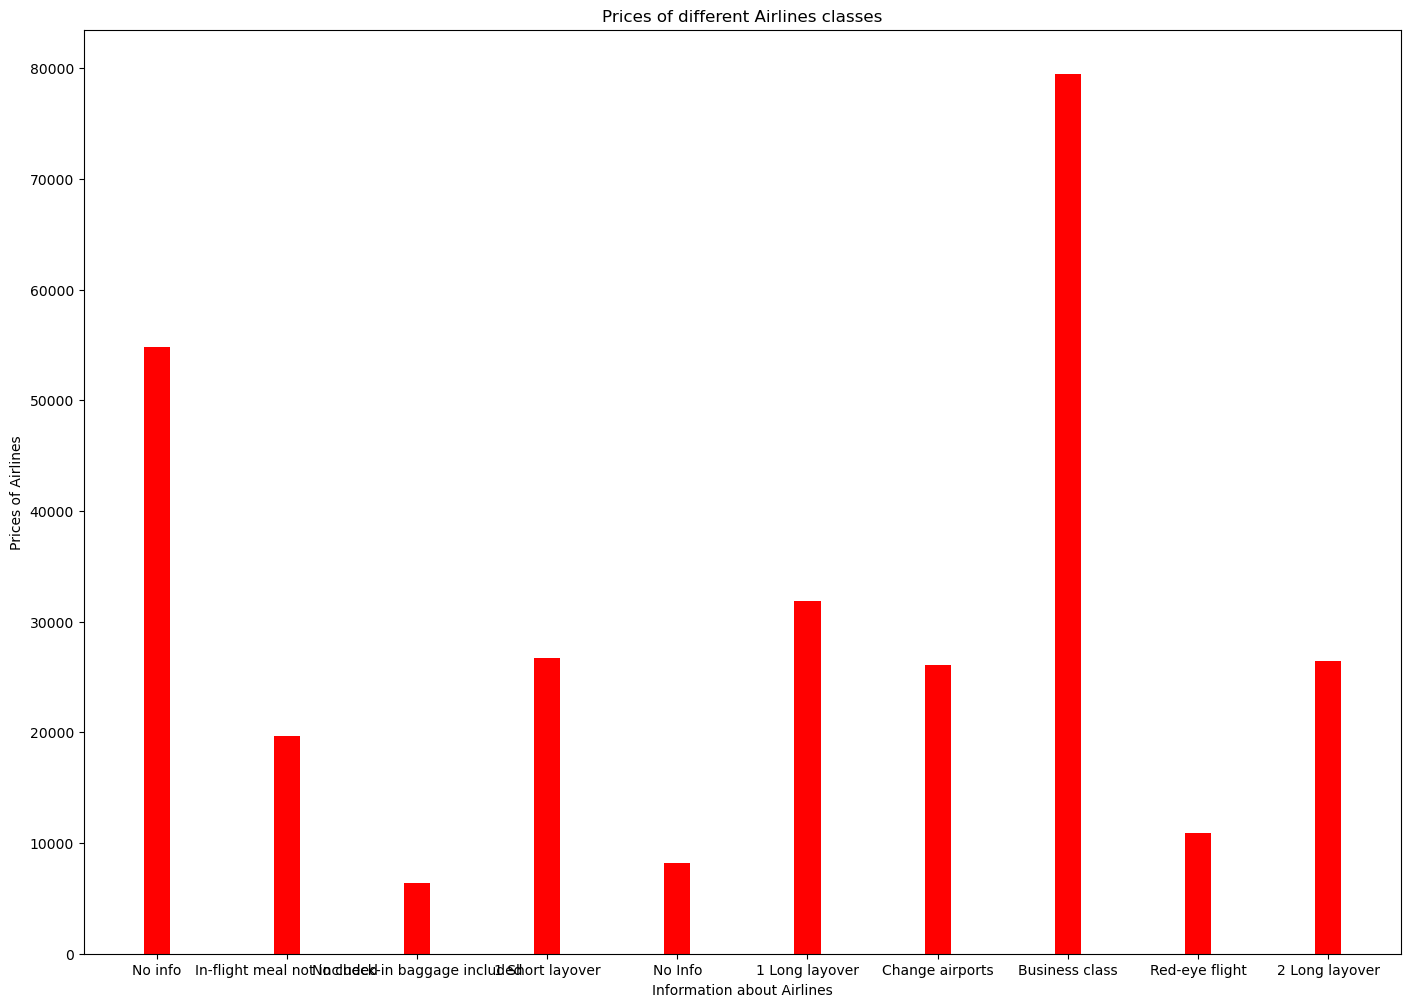

In [42]:

fig = plt.figure(figsize =(17, 12))
plt.bar(train.Additional_Info, train.Price, color ='red',
        width = 0.2)
 
plt.xlabel("Information about Airlines")
plt.ylabel("Prices of Airlines")
plt.title("Prices of different Airlines classes")
plt.show()

From above bar plot it is clear that the ticket prices for Business class is higher in all Airline classes.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

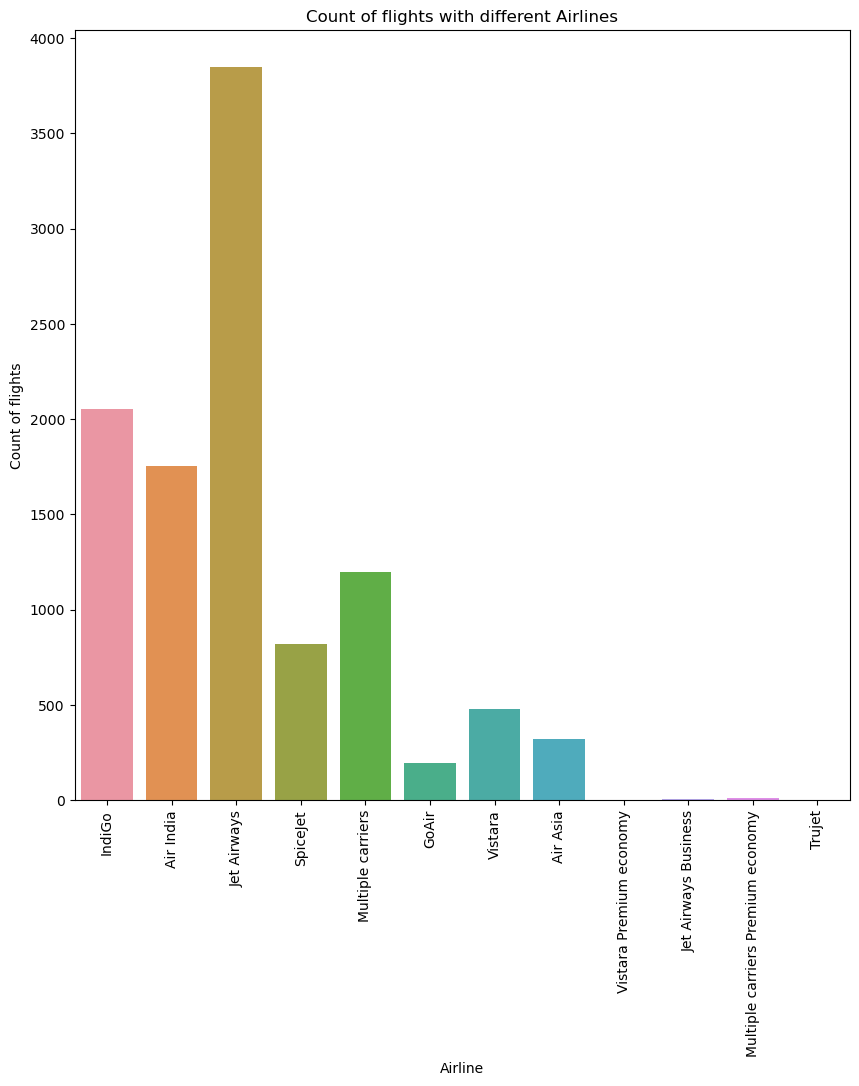

In [43]:
plt.figure(figsize = (10, 10))
plt.title('Count of flights with different Airlines')
sns.countplot(x = 'Airline', data = train)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 90)

Observation:
    1. We can see that there are more flights of Jet Airways are aviliable.
    
    2.Also, Jet Airways Business, Vistara Premium economy, Trujet have actually almost negligible flights.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'New Delhi'),
  Text(1, 0, 'Banglore'),
  Text(2, 0, 'Cochin'),
  Text(3, 0, 'Kolkata'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Hyderabad')])

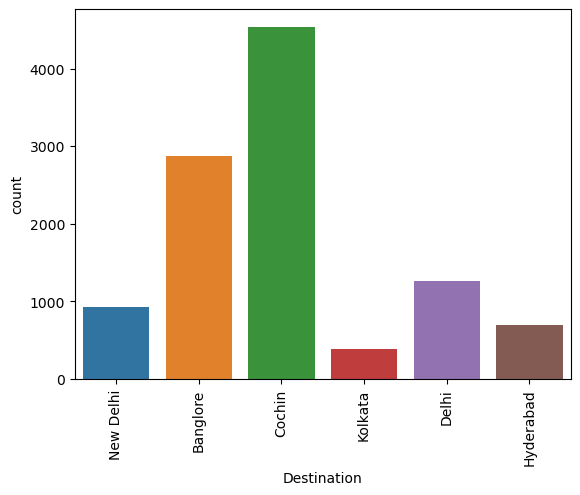

In [48]:
plot=plt.figure()
sns.countplot(x='Destination',data=train)
plt.xticks(rotation=90)

In [ ]:
Observation: We can say that max number of count of destination are from Cochin

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Banglore'),
  Text(1, 0, 'Kolkata'),
  Text(2, 0, 'Delhi'),
  Text(3, 0, 'Chennai'),
  Text(4, 0, 'Mumbai')])

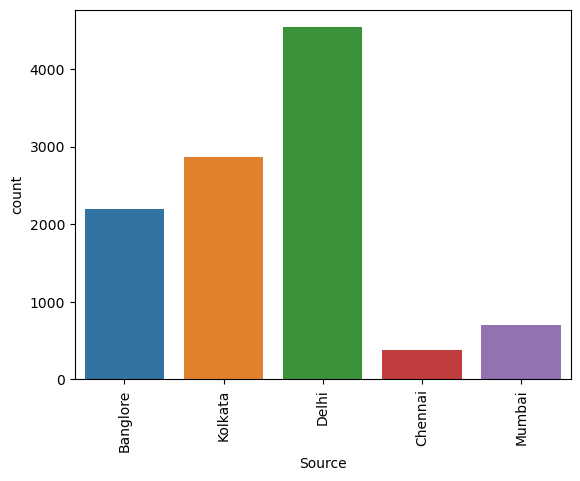

In [49]:
plot=plt.figure()
sns.countplot(x='Source',data=train)
plt.xticks(rotation=90)

Observation: We can say that max number of people are travelling from Delhi

<AxesSubplot: xlabel='Total_Stops', ylabel='Price'>

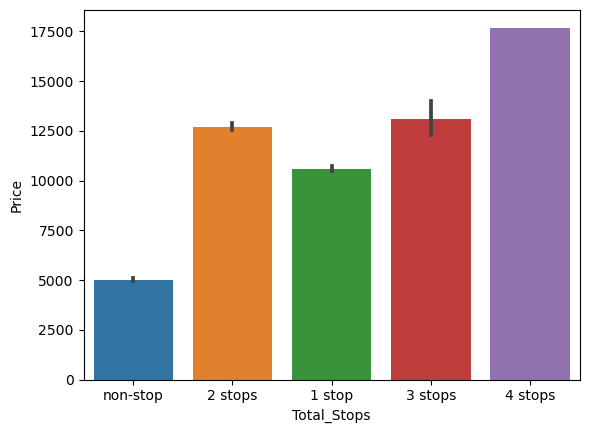

In [55]:
sns.barplot(x=train.Total_Stops,y=train.Price)

We can say that ,flight tickets of 4 stops having high price.

In [16]:
# Find Missing Values 
combineddf.isnull().sum().sort_values(ascending=False)

Route              1
Total_Stops        1
Airline            0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
dtype: int64

In [17]:
combineddf[combineddf['Total_Stops'].isnull()]   #Mode Imputation

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019


In [18]:
combineddf['Total_Stops'] = combineddf['Total_Stops'].fillna(combineddf['Total_Stops'].value_counts().idxmax())

In [19]:
combineddf['Total_Stops'] = combineddf['Total_Stops'].replace('non-stop','0 stop')

In [20]:
combineddf.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0 stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [21]:
combineddf['Total_Stops'] = combineddf['Total_Stops'].str.split(' ').str[0]

In [22]:
combineddf.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [23]:
combineddf['Total_Stops'] = combineddf['Total_Stops'].astype('int')

In [24]:
#Handling varaible Arrival time and departure time
combineddf['Arrival_Time'] = combineddf['Arrival_Time'].str.split(' ').str[0]

In [25]:
combineddf['Arrival_Hour'] = combineddf['Arrival_Time'].str.split(':').str[0]
combineddf['Arrival_Minute'] = combineddf['Arrival_Time'].str.split(':').str[1]

In [26]:
combineddf['Arrival_Hour'] = combineddf['Arrival_Hour'].astype('int')
combineddf['Arrival_Minute'] = combineddf['Arrival_Minute'].astype('int')

In [27]:
combineddf = combineddf.drop(['Arrival_Time'],axis=1)

In [28]:
combineddf['Departure_Hour'] = combineddf['Dep_Time'].str.split(':').str[0]
combineddf['Departure_Minute'] = combineddf['Dep_Time'].str.split(':').str[1]

In [29]:
combineddf['Departure_Hour'] = combineddf['Departure_Hour'].astype('int')
combineddf['Departure_Minute'] = combineddf['Departure_Minute'].astype('int')

In [30]:
combineddf = combineddf.drop(['Dep_Time'],axis=1)

In [31]:
combineddf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50


In [33]:
combineddf['Duration_Hour'] = combineddf['Duration'].str.split(' ').str[0]
combineddf['Duration_Minute'] = combineddf['Duration'].str.split(' ').str[1]

In [35]:
combineddf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,19h,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4h,45m


In [36]:
combineddf['Duration_Hour']= combineddf['Duration_Hour'].str.split('h').str[0]
combineddf['Duration_Minute'] = combineddf['Duration_Minute'].str.split('m').str[0]

In [38]:
combineddf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,2019,4,25,9,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18,5,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [39]:
combineddf['Route_1'] = combineddf['Route'].str.split('→ ').str[0]
combineddf['Route_2'] = combineddf['Route'].str.split('→ ').str[1]
combineddf['Route_3'] = combineddf['Route'].str.split('→ ').str[2]
combineddf['Route_4'] = combineddf['Route'].str.split('→ ').str[3]
combineddf['Route_5'] = combineddf['Route'].str.split('→ ').str[4]

In [41]:
combineddf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,...,10,22,20,2,50,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,...,25,9,25,19,NaN,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,30,18,5,5,25,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,35,16,50,4,45,BLR,NAG,DEL,NaN,NaN


In [42]:
combineddf['Route_1'].fillna('None',inplace=True)
combineddf['Route_2'].fillna('None',inplace=True)
combineddf['Route_3'].fillna('None',inplace=True)
combineddf['Route_4'].fillna('None',inplace=True)
combineddf['Route_5'].fillna('None',inplace=True)

In [43]:
combineddf.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,...,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,...,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,...,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2,No info,13882,9,6,...,25,9,25,19,NaN,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1,No info,6218,12,5,...,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1,No info,13302,1,3,...,35,16,50,4,45,BLR,NAG,DEL,None,None


In [48]:
combineddf.isnull().sum()

Airline             0
Source              0
Destination         0
Route               1
Duration            0
Total_Stops         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Duration_Hour       0
Duration_Minute     0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [46]:
combineddf['Duration_Minute'] = combineddf['Duration_Minute'].fillna(0)

In [47]:
combineddf['Duration_Hour'] = combineddf['Duration_Hour'].fillna(0)

In [53]:
combineddf.drop(['Route'],axis=1,inplace=True)

In [54]:
combineddf.drop(['Duration'],axis=1,inplace=True)

In [56]:
combineddf['Duration_Minute'] = combineddf['Duration_Minute'].astype(int)

In [57]:
combineddf['Duration_Hour'] = combineddf['Duration_Hour'].str.split('m').str[0]

In [58]:
combineddf['Duration_Hour'] = combineddf['Duration_Hour'].astype(int)

In [59]:
combineddf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           13354 non-null  object
 1   Source            13354 non-null  object
 2   Destination       13354 non-null  object
 3   Total_Stops       13354 non-null  int32 
 4   Additional_Info   13354 non-null  object
 5   Price             13354 non-null  object
 6   Date              13354 non-null  int32 
 7   Month             13354 non-null  int32 
 8   Year              13354 non-null  int32 
 9   Arrival_Hour      13354 non-null  int32 
 10  Arrival_Minute    13354 non-null  int32 
 11  Departure_Hour    13354 non-null  int32 
 12  Departure_Minute  13354 non-null  int32 
 13  Duration_Hour     13354 non-null  int32 
 14  Duration_Minute   13354 non-null  int32 
 15  Route_1           13354 non-null  object
 16  Route_2           13354 non-null  object
 17  Route_3      

In [61]:
combineddf.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,5,50,7,25,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,9,25,19,0,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,5,5,25,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45,BLR,NAG,DEL,None,None


In [62]:
combineddf.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Price', 'Date', 'Month', 'Year', 'Arrival_Hour', 'Arrival_Minute',
       'Departure_Hour', 'Departure_Minute', 'Duration_Hour',
       'Duration_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4',
       'Route_5'],
      dtype='object')

In [63]:
combineddf.shape

(13354, 20)

In [64]:
#Split data into numeric and object variables
objectcols=combineddf.select_dtypes(include='object')
numericcols=combineddf.select_dtypes(include=np.number)

In [65]:
#Move price variable to numericcols
numericcols['Price']=objectcols.Price 

In [66]:
objectcols=objectcols.drop('Price',axis=1)

# Label Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le=LabelEncoder()

In [69]:
objectcols_encode=objectcols.apply(le.fit_transform)

In [70]:
objectcols_encode.head()

,Airline,Source,Destination,Additional_Info,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,0,13,24,12,4
1,1,3,0,8,2,25,1,3,4
2,4,2,1,8,3,32,4,5,4
3,3,3,0,8,2,34,3,12,4
4,3,0,5,8,0,34,8,12,4


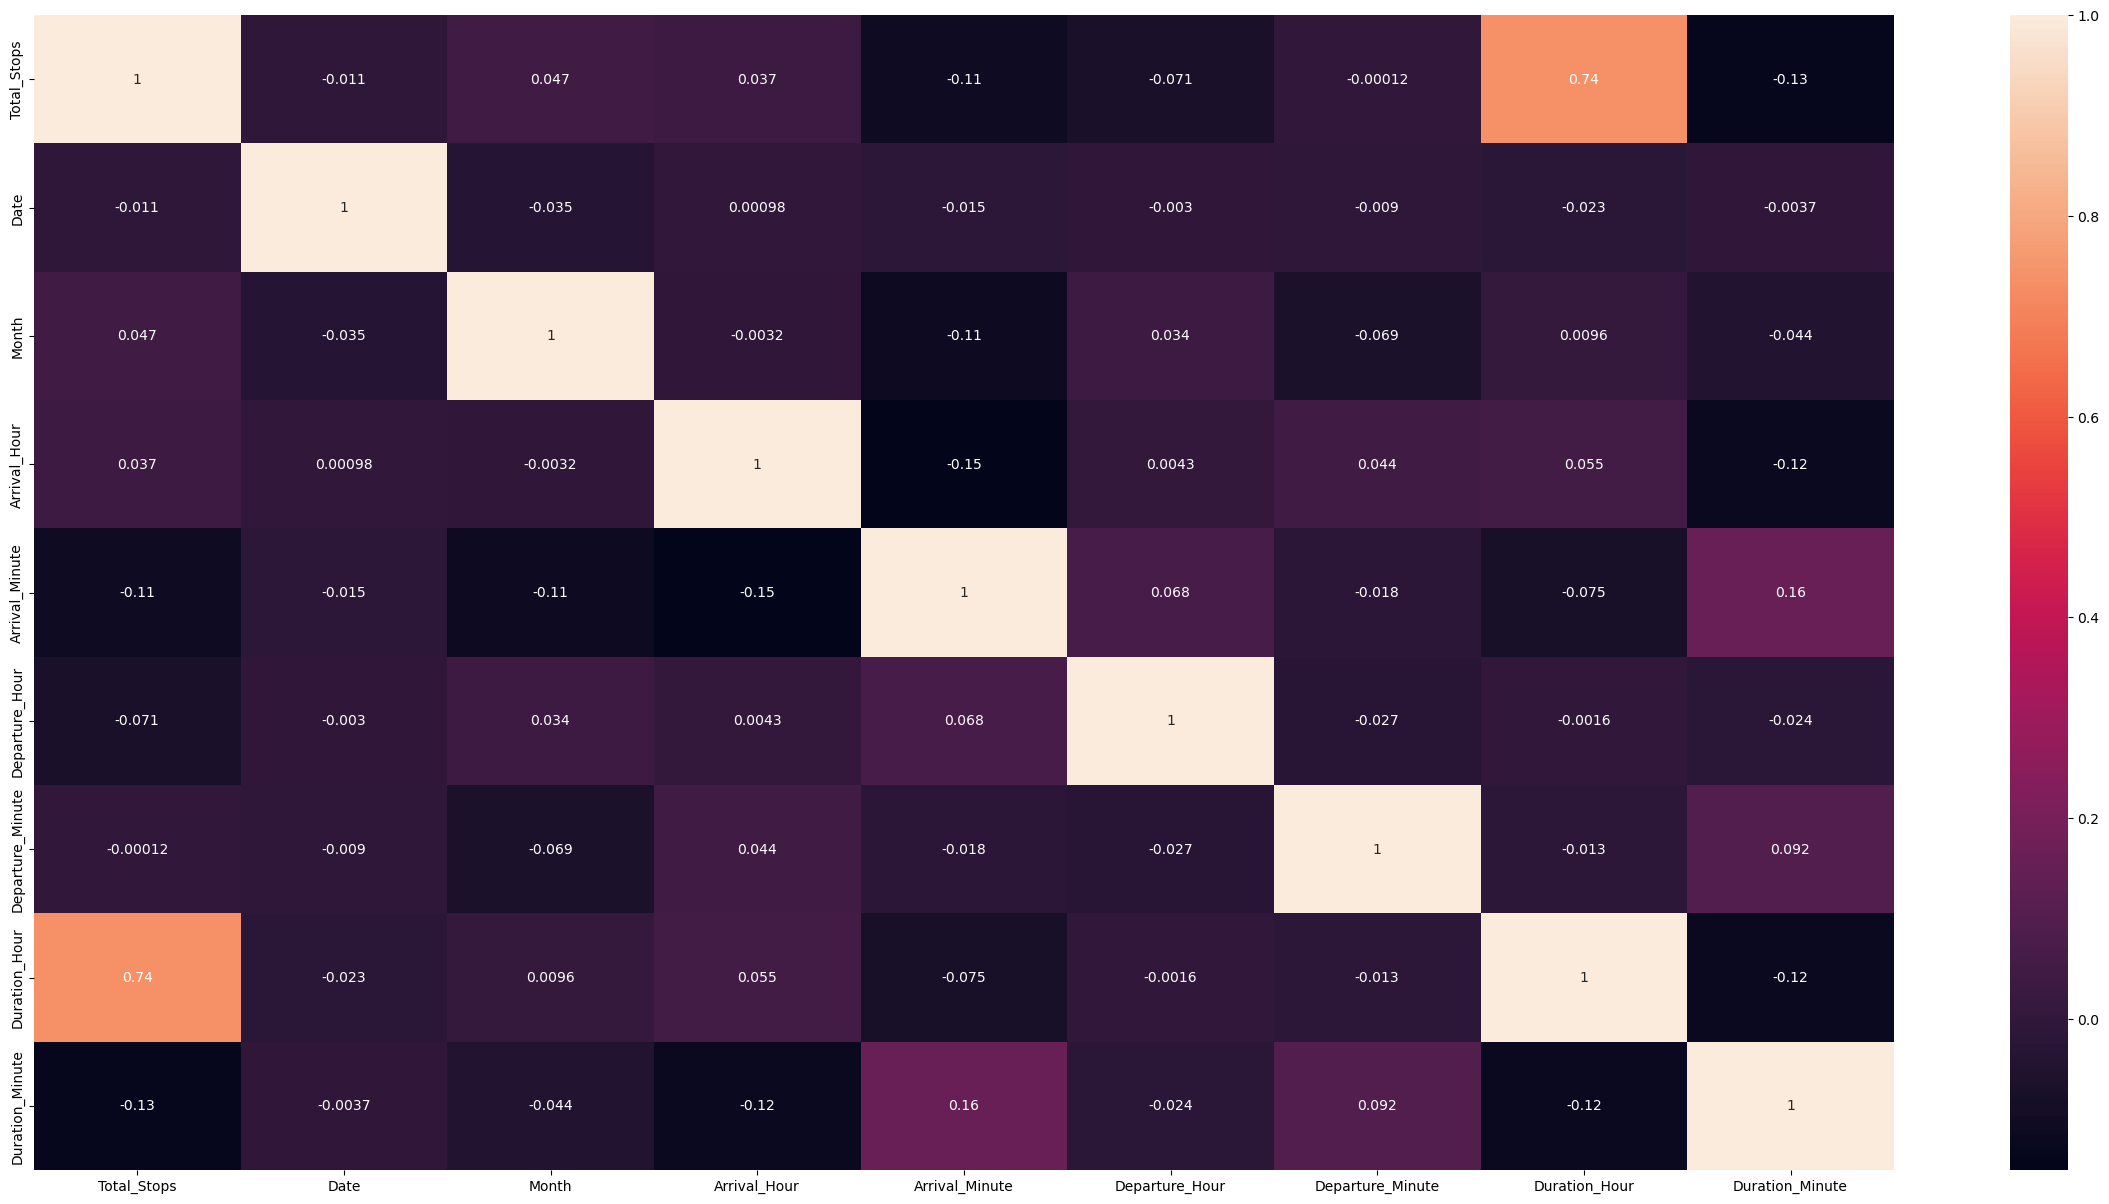

In [73]:
#Multicollarinity
plt.figure(figsize=(30,15))
sns.heatmap(numericcols.drop(["Price","Year"],axis=1).corr(),annot=True)
plt.show()

In [74]:
numericcols.drop('Price',axis=1).head()

,Total_Stops,Date,Month,Year,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Duration_Hour,Duration_Minute
0,0,24,3,2019,1,10,22,20,2,50
1,2,1,5,2019,13,15,5,50,7,25
2,2,9,6,2019,4,25,9,25,19,0
3,1,12,5,2019,23,30,18,5,5,25
4,1,1,3,2019,21,35,16,50,4,45


In [75]:
#As year as only one entity we can drop the variable Year
numericcols=numericcols.drop('Year',axis=1)

# Feature Scaling 

<AxesSubplot: >

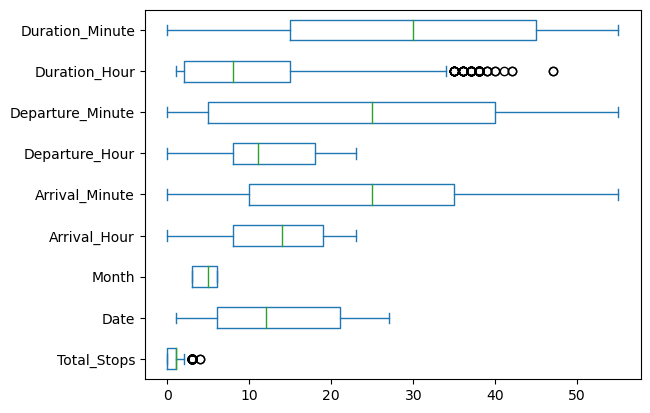

In [78]:
numericcols.plot(kind='box',vert=False)

In [76]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler=StandardScaler()

In [80]:
numericcols_scaled=scaler.fit_transform(numericcols.drop('Price',axis=1))

In [86]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols.columns[0:9])

In [88]:
numericcols_scaled=numericcols_scaled.reset_index()  #reset the indexes of all columns before concatting
objectcols_encode=objectcols_encode.reset_index()

In [89]:
combineddf_clean=pd.concat([numericcols_scaled,objectcols_encode],axis=1)

In [90]:
numericcols=numericcols.reset_index()

In [91]:
combineddf_clean['Price']=numericcols.Price

In [93]:
flighttrain_df=combineddf_clean[combineddf_clean.Price!='test']
flighttest_df=combineddf_clean[combineddf_clean.Price=='test']

In [94]:
flighttest_df=flighttest_df.drop('Price',axis=1)

In [146]:
#split data into y and X
y=flighttrain_df.Price
X=flighttrain_df.drop(['Price'],axis=1)

In [147]:
y=y.astype('int64')

<AxesSubplot: ylabel='Frequency'>

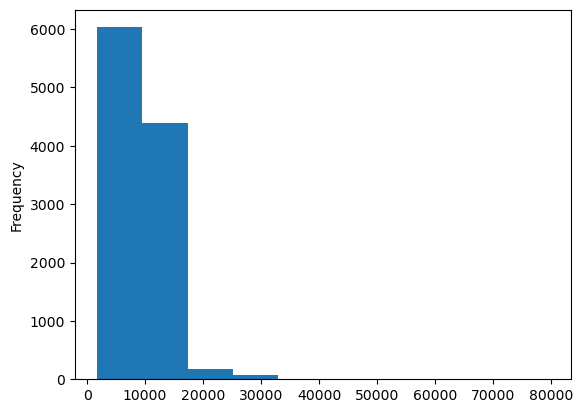

In [154]:
y.plot(kind='hist')

<AxesSubplot: >

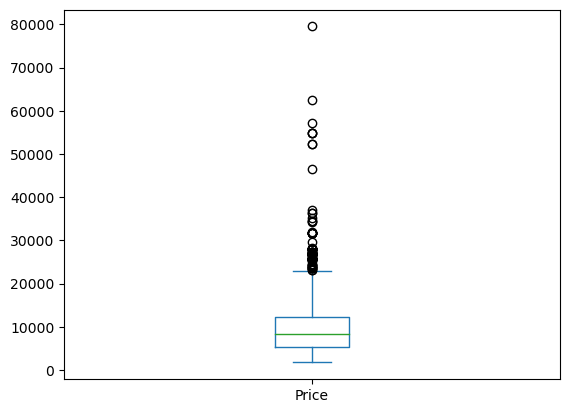

In [155]:
y.plot(kind='box')

<AxesSubplot: >

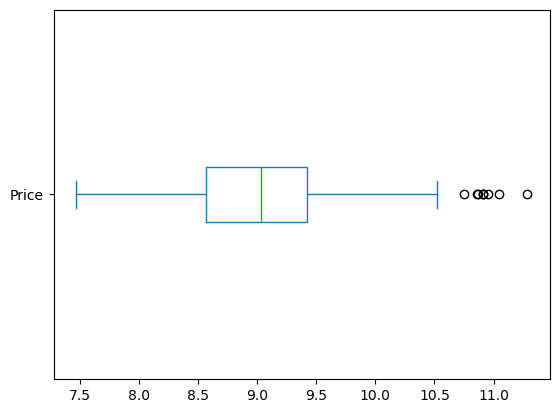

In [156]:
np.log(y).plot(kind='box',vert=False)  #Logarithmic transformation

# Linear Regression

In [157]:
from sklearn.linear_model import LinearRegression

In [158]:
reg=LinearRegression()

In [159]:
regmodel=reg.fit(X,y)

In [160]:
regmodel.score(X,y)

0.498492480001256

In [161]:
regpredict=regmodel.predict(X)

In [162]:
regresid=y-regpredict # Residual

In [163]:
np.sqrt(np.mean(regresid**2)) # RMSE 

3265.4823971840524

# Decision Tree Regression

In [164]:
from sklearn.tree import DecisionTreeRegressor

In [165]:
tree=DecisionTreeRegressor(max_depth=8)

In [166]:
treemodel=tree.fit(X,y)

In [167]:
treemodel.score(X,y)

0.8649502798324717

In [168]:
treepredict=treemodel.predict(X)

In [169]:
treeresid=y-treepredict

In [170]:
np.sqrt(np.mean(treeresid**2))

1694.55420906272

# Random Forest Regressor

In [171]:
from sklearn.ensemble import RandomForestRegressor

In [172]:
rf=RandomForestRegressor(n_estimators=500)

In [173]:
rfmodel=rf.fit(X,y)

In [174]:
rfmodel.score(X,y)

0.984445649148229

In [175]:
rfpredict=rfmodel.predict(X)

In [176]:
rfresid=y-rfpredict

In [177]:
np.sqrt(np.mean(rfresid**2))

575.0883471143537

In [178]:
rftestmodel=rfmodel.predict(flighttest_df)

In [179]:
pd.DataFrame(rftestmodel).to_csv("RF.csv")

# Gradient Boosting Regressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor

In [135]:
gbm=GradientBoostingRegressor(n_estimators=500)

In [136]:
gbmmodel=gbm.fit(X,y)

In [139]:
gbmmodel.score(X,y)

0.9035699763296363

In [140]:
gbmpredict=gbmmodel.predict(X)

In [141]:
gbmresid=y-gbmpredict

In [142]:
np.sqrt(np.mean(gbmresid**2))

1431.9068243792483

In [152]:
print(flighttest_df.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2671 entries, 10683 to 13353
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             2671 non-null   int64  
 1   Total_Stops       2671 non-null   float64
 2   Date              2671 non-null   float64
 3   Month             2671 non-null   float64
 4   Arrival_Hour      2671 non-null   float64
 5   Arrival_Minute    2671 non-null   float64
 6   Departure_Hour    2671 non-null   float64
 7   Departure_Minute  2671 non-null   float64
 8   Duration_Hour     2671 non-null   float64
 9   Duration_Minute   2671 non-null   float64
 10  index             2671 non-null   int64  
 11  Airline           2671 non-null   int32  
 12  Source            2671 non-null   int32  
 13  Destination       2671 non-null   int32  
 14  Additional_Info   2671 non-null   int32  
 15  Route_1           2671 non-null   int32  
 16  Route_2           2671 non-null   int

In [153]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10682
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             10683 non-null  int64  
 1   Total_Stops       10683 non-null  float64
 2   Date              10683 non-null  float64
 3   Month             10683 non-null  float64
 4   Arrival_Hour      10683 non-null  float64
 5   Arrival_Minute    10683 non-null  float64
 6   Departure_Hour    10683 non-null  float64
 7   Departure_Minute  10683 non-null  float64
 8   Duration_Hour     10683 non-null  float64
 9   Duration_Minute   10683 non-null  float64
 10  index             10683 non-null  int64  
 11  Airline           10683 non-null  int32  
 12  Source            10683 non-null  int32  
 13  Destination       10683 non-null  int32  
 14  Additional_Info   10683 non-null  int32  
 15  Route_1           10683 non-null  int32  
 16  Route_2           10683 non-null  int32 

# Conclusion:

I entered the predicted test values into the competition Flight Price prediction challenge on the https://machinehack.com/hackathons/predict_the_flight_ticket_price_hackathon/ Of all of the models The most accurate classification method is Random forest with best score of 0.94284 and rank is 150.